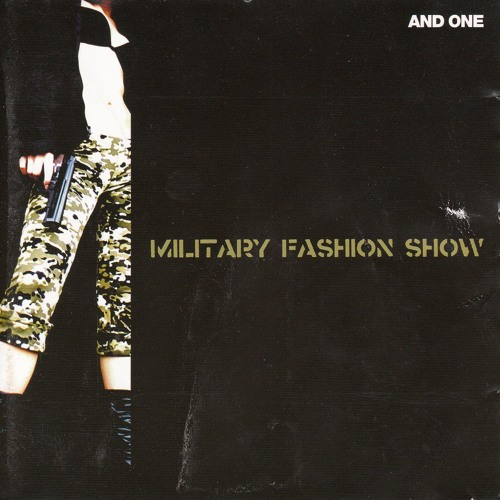

In [1]:
from IPython.display import Image

image = 'examples/sample.jpg'
Image(filename=image, width=400, height=400)

In [2]:
from crrptme.jpegcore import JPEGCore

jc = JPEGCore(image)

[CorruptMe] Downloading jpeg library from https://github.com/grigus-hub/crrpt-sandbox-wrapper/releases/download/latest/jpeg62.dll...
[CorruptMe] Cached at C:\Users\grigus\AppData\Local\Temp\corruptme_libs\jpeg62.dll
[CorruptMe] Downloading corruptjpeg library from https://github.com/grigus-hub/crrpt-sandbox-wrapper/releases/download/latest/corruptjpeg_latest.dll...
[CorruptMe] Cached at C:\Users\grigus\AppData\Local\Temp\corruptme_libs\corruptjpeg_latest.dll


In [3]:
import numpy as np
import PIL.Image as PILImage

def get_quant_map(channel: int):
    if channel >= jc.num_components:
        raise ValueError(f"Channel {channel} out of range (max {jc.num_components-1})")

    qtable = jc.get_quant_table(channel).astype(np.float64)

    qtable = np.log(qtable + 1.0)
    qtable -= qtable.min()
    qtable /= qtable.max()
    qtable *= 255.0
    qtable = qtable.astype(np.uint8)

    bx_count = jc.get_num_blocks_x(channel)
    by_count = jc.get_num_blocks_y(channel)

    quant_map = np.tile(qtable, (by_count, bx_count))

    quant_map = np.array(
        PILImage.fromarray(quant_map).resize((jc.width, jc.height), resample=PILImage.NEAREST)
    )

    return quant_map


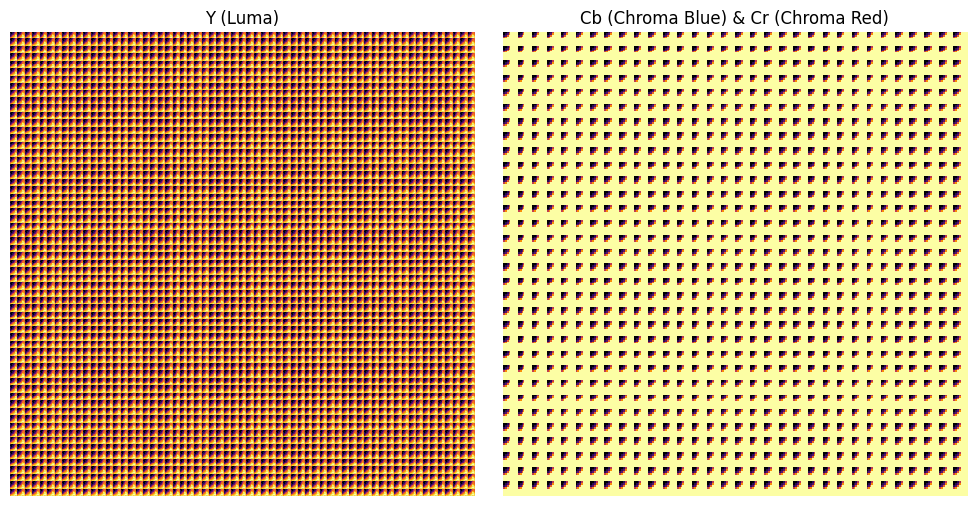

In [7]:
import matplotlib.pyplot as plt

try:
    quant_map = get_quant_map(2)
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    channel_names = ["Y (Luma)", "Cb (Chroma Blue)", "Cr (Chroma Red)"]
except RuntimeError:
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    channel_names = ["Y (Luma)", "Cb (Chroma Blue) & Cr (Chroma Red)"]

for ch, ax in enumerate(axes):
    if ch < jc.num_components:
        quant_map = get_quant_map(ch)
        ax.imshow(quant_map, cmap="inferno", interpolation="none")
        ax.set_title(channel_names[ch])
    else:
        ax.axis("off")
    ax.axis("off")

plt.tight_layout()
plt.show()